In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

2025-03-02 19:04:55.300508: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-02 19:04:55.300834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-02 19:04:55.313893: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 19:04:55.399544: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-02 19:04:58.181988: W tensorflow/compiler/tf2

In [2]:
data = pd.read_csv("gwl_rain_processed.csv")

In [3]:
data

,Unnamed: 0,Date,Rainfall,Ane,Bhadalwadi,Bukum,Dhumalwadi,Dorlewadi,Jejuri,Junnar,...,Kasurdi-1,Kolawade,Ale-1,Belhe-1,Kamunde,Khadki,Wagholi-1,Zendewadi-1,Month,Year
0,0,2000-01-01,0.001000,5.0000,2.4000,0.5500,5.5000,4.6000,1.4000,4.4000,...,5.5213,4.3063,10.7831,13.0093,7.0902,4.8556,4.3151,11.4266,1,2000
1,1,2000-05-01,0.776626,4.4300,1.5800,0.8400,7.9500,5.6640,3.2000,5.3800,...,4.2708,4.9702,10.3325,14.3558,9.5004,5.0241,4.7180,9.5727,5,2000
2,2,2000-08-01,2.647732,3.0700,0.0100,0.3400,8.5400,5.1500,1.9400,4.2300,...,2.8827,3.0275,8.3702,11.6419,6.2306,2.0108,5.3265,4.0400,8,2000
3,3,2000-11-01,0.474960,4.6600,0.4500,0.4700,12.5600,4.5500,5.6000,4.0900,...,3.3100,3.3908,5.9060,3.7187,6.5122,2.7736,4.6050,4.7448,11,2000
4,4,2001-01-01,0.208187,5.3800,0.1300,0.6700,10.8000,6.3300,4.9500,5.1600,...,4.4962,4.3755,10.8418,13.7385,9.2532,5.2878,4.4234,9.5701,1,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,2023-05-01,0.627500,7.7600,2.5000,6.1000,11.4800,6.3200,8.4800,4.0500,...,7.1700,4.9300,10.1300,13.3200,5.1600,2.4028,4.1000,10.6600,5,2023
88,88,2023-09-01,5.767257,4.6502,0.8880,1.1611,3.3607,1.2974,1.4507,6.5477,...,3.2690,1.1391,4.2957,6.4742,2.3507,1.5924,2.6100,2.2548,9,2023
89,89,2023-10-01,0.606645,4.7576,2.4945,0.7142,5.6820,1.7823,2.8286,5.1356,...,6.6252,1.3872,5.9930,7.8299,4.7634,1.7016,2.6910,4.6061,10,2023
90,90,2023-11-01,1.080533,4.7676,1.5016,1.1022,5.2786,1.7915,1.8240,6.0549,...,6.6319,1.3113,6.9140,7.9249,5.1468,1.6053,2.5575,3.9867,11,2023


In [4]:
# !pip install statsmodels

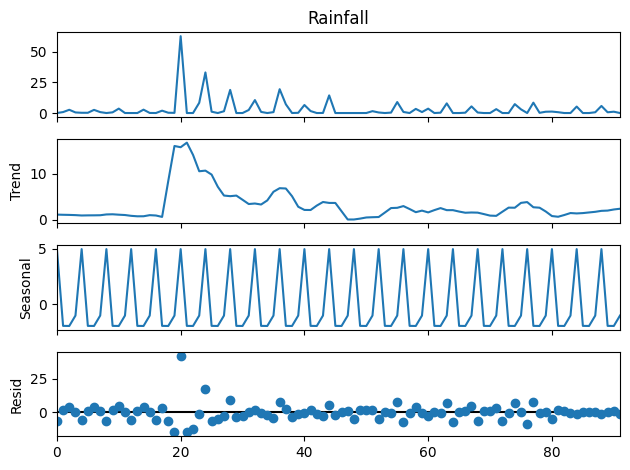

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
result = seasonal_decompose(data['Rainfall'], model='additive', extrapolate_trend='freq',period=4)
result.plot()
plt.tight_layout()
plt.show()

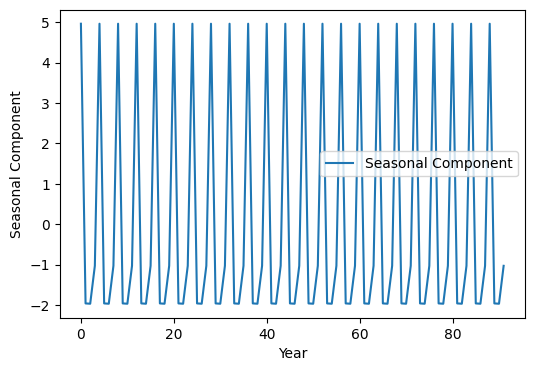

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(result.seasonal, label='Seasonal Component')
# plt.title('Seasonal Component of Air Passengers Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

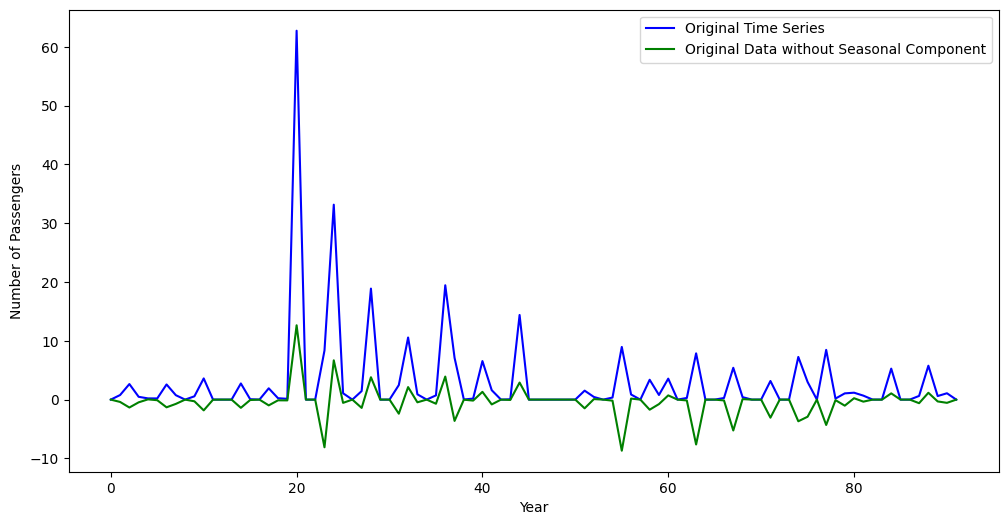

In [7]:
plt.figure(figsize=(12, 6))
# Plot the original time series data
plt.plot(data['Rainfall'], label='Original Time Series', color='blue')
data_without_seasonal = data['Rainfall'] / result.seasonal
# Plot the original data without the seasonal component
plt.plot(data_without_seasonal, label='Original Data without Seasonal Component', color='green')
# plt.title('Air Passengers Time Series with and without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler



In [9]:
data = pd.read_csv("gwl_rain_processed.csv")

In [10]:
col_list = list()
col_list.append(data.columns[0])
col_list += list(data.columns[-2:])
# col_list
data.drop(columns=col_list, inplace=True)

In [11]:
def create_dataset(data, look_back=1):
   X, y = [], []
   for i in range(len(data)-look_back-1):
       a = data[i:(i+look_back)]
       X.append(a)
       y.append(data[i + look_back])
   return np.array(X), np.array(y)

In [12]:
scaler2 = MinMaxScaler()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
cols = list(data.columns)
data = pd.DataFrame(scaler2.fit_transform(data),columns=cols)

In [55]:
look_back = 12
rain_data = data['Rainfall']
X, y = create_dataset(rain_data, look_back)
X = np.reshape(X,(X.shape[0],look_back,1))
print(X.shape)
print(X)

(79, 12, 1)
[[[0.00000000e+00]
  [1.23625115e-02]
  [4.21856232e-02]
  [7.55433342e-03]
  [3.30230486e-03]
  [3.17633726e-03]
  [4.10876999e-02]
  [1.19797825e-02]
  [0.00000000e+00]
  [8.94786412e-03]
  [5.74399908e-02]
  [2.54435696e-04]]

 [[1.23625115e-02]
  [4.21856232e-02]
  [7.55433342e-03]
  [3.30230486e-03]
  [3.17633726e-03]
  [4.10876999e-02]
  [1.19797825e-02]
  [0.00000000e+00]
  [8.94786412e-03]
  [5.74399908e-02]
  [2.54435696e-04]
  [0.00000000e+00]]

 [[4.21856232e-02]
  [7.55433342e-03]
  [3.30230486e-03]
  [3.17633726e-03]
  [4.10876999e-02]
  [1.19797825e-02]
  [0.00000000e+00]
  [8.94786412e-03]
  [5.74399908e-02]
  [2.54435696e-04]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[7.55433342e-03]
  [3.30230486e-03]
  [3.17633726e-03]
  [4.10876999e-02]
  [1.19797825e-02]
  [0.00000000e+00]
  [8.94786412e-03]
  [5.74399908e-02]
  [2.54435696e-04]
  [0.00000000e+00]
  [0.00000000e+00]
  [4.37684446e-02]]

 [[3.30230486e-03]
  [3.17633726e-03]
  [4.10876999e-02]
  [1.197978

In [56]:
model = Sequential()
model.add(GRU(50,return_sequences=True, input_shape=(look_back,1)))
model.add(GRU(50))
model.add(Dense(64))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['Accuracy'])

In [58]:
model.fit(X,y, batch_size=12, verbose=1, epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 72ms/step - loss: 0.0178 - Accuracy: 0.3165
Epoch 2/10
7/7 [==============================] - 0s 45ms/step - loss: 0.0177 - Accuracy: 0.3165
Epoch 3/10
7/7 [==============================] - 0s 42ms/step - loss: 0.0172 - Accuracy: 0.3165
Epoch 4/10
7/7 [==============================] - 0s 54ms/step - loss: 0.0172 - Accuracy: 0.3165
Epoch 5/10
7/7 [==============================] - 0s 46ms/step - loss: 0.0176 - Accuracy: 0.3165
Epoch 6/10
7/7 [==============================] - 0s 46ms/step - loss: 0.0169 - Accuracy: 0.3165
Epoch 7/10
7/7 [==============================] - 0s 53ms/step - loss: 0.0169 - Accuracy: 0.3165
Epoch 8/10
7/7 [==============================] - 0s 46ms/step - loss: 0.0172 - Accuracy: 0.3165
Epoch 9/10
7/7 [==============================] - 0s 51ms/step - loss: 0.0167 - Accuracy: 0.3165
Epoch 10/10
7/7 [==============================] - 0s 47ms/step - loss: 0.0166 - Accuracy: 0.3165


In [59]:
y_pred = model.predict(X)

3/3 [==============================] - 1s 22ms/step


In [60]:
# y_pred

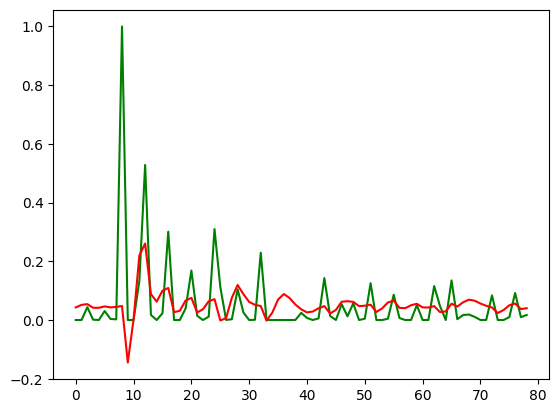

In [61]:
plt.plot(y,color='g')
plt.plot(y_pred,color='r')

In [62]:
models = dict()
predictions_dict = dict()

In [63]:
rain = 'Rainfall'

In [64]:
models[rain] = model

In [33]:
def prepare_data(data,column,lookback=4):
    X, y = [], []
    for i in range(len(data[rain])-look_back-1):
        a = list(data[column][i:(i+lookback)])
        a.append(data[rain][(i+lookback)])
        X.append(a)
        y.append(data[column][i + lookback])
    return np.array(X), np.array(y)
    

In [36]:
lookback = 12
from keras import backend as K

for column in data.columns[1:3]:
    
    slice = data[[rain,column]]
    X, y = prepare_data(slice,column)
    # print(f"\nfor column {column}: \n{X}")

    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    models[column] = Sequential()
    models[column].add(GRU(50, return_sequences=True, input_shape=((look_back + 1), 1)))
    models[column].add(Dense(32))
    models[column].add(GRU(32))
    # models[column].add(GRU(32))
    # models[column].add(Dense(16))
    models[column].add(Dense(1))

    models[column].compile(optimizer='adam', loss='mean_squared_error',metrics=['Accuracy'])
    K.set_value(models[column].optimizer.learning_rate, 0.0002)
    models[column].fit(X, y, batch_size=2, verbose=1, epochs=70)

    prediction_i = models[column].predict(X)
    predictions_dict[column] = prediction_i

Epoch 1/70
44/44 [==============================] - 8s 43ms/step - loss: 0.1232 - Accuracy: 0.0115
Epoch 2/70
44/44 [==============================] - 2s 45ms/step - loss: 0.0358 - Accuracy: 0.0230
Epoch 3/70
44/44 [==============================] - 2s 43ms/step - loss: 0.0351 - Accuracy: 0.0230
Epoch 4/70
44/44 [==============================] - 2s 44ms/step - loss: 0.0351 - Accuracy: 0.0230
Epoch 5/70
44/44 [==============================] - 2s 42ms/step - loss: 0.0363 - Accuracy: 0.0230
Epoch 6/70
44/44 [==============================] - 2s 44ms/step - loss: 0.0370 - Accuracy: 0.0115
Epoch 7/70
25/44 [================>.............] - ETA: 0s - loss: 0.0402 - Accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
# predictions_dict

In [24]:
column = 'Ane'
predictions = np.array(predictions_dict[column])
test = np.array(data[column][lookback+1:])
print(len(predictions))
print(len(test))

mae = np.mean(np.abs(predictions - test)) 
rmse = np.sqrt(np.mean((predictions - test)*2)) 
print(f'MAE: {mae}, RMSE: {rmse}') 
# [Source: https://toxigon.com]

87
87
MAE: 0.16614008543011574, RMSE: 0.0451574604421608


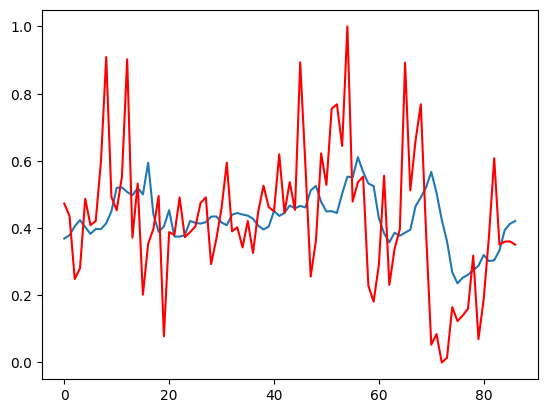

In [25]:
plt.plot(predictions)
plt.plot(test,color='r')

In [29]:
models['Rainfall'] == model

True

1/1 [==============================] - 0s 46ms/step


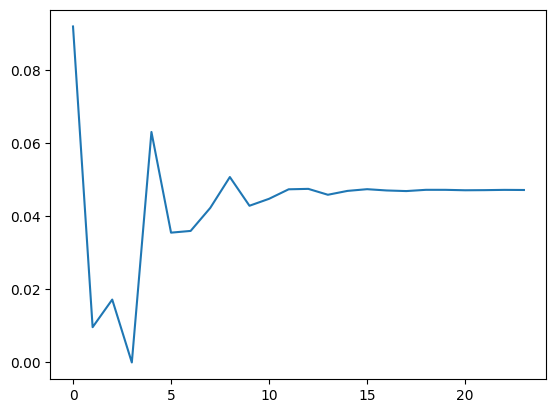

In [65]:
def make_predictions(n,lookback,data,models):
    y_rain = np.array(data['Rainfall'][-lookback:])
    for i in range(n):
        X_rain = list(y_rain[-lookback:])
        X_rain = np.reshape(X_rain,(1,lookback,1))
        # print("for X :",X_rain)
        y_ = models['Rainfall'].predict(X_rain)
        # print("Y is: ",y_)
        y_rain= np.append(y_rain,y_)
    # print(y_rain)

    plt.plot(y_rain)


make_predictions(20,4,data,models)